#### Introdcution
The BDNF(Brain-Derived Neurotrophic Factor) levels was measureed by using Elisa test kit(LsBio). The whole blood was withdrawn by using infusion kits and syringe. The purpose of this analysis to determine which method can achieved the highest BDNF levels.

In [257]:
"""
Created on Tuesday 21 Oct 2022
Author: ZMW
"""
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [258]:
#data path
path = os.getcwd()
dirname = os.path.dirname(path)
data_file = 'data/201022_BDNF_ELISA.xlsx'
data_path = os.path.join(dirname,data_file)

In [259]:
#Load the fitted dataset
data = pd.read_excel(data_path)
data = data.iloc[9:17,1:8]#slice rows and columns where data exist
data.columns = ['STD_1','SYN','DUP_SYN','IN','DUP_IN','STD_2','STD_CONC']


#### columns names
STD_1, STD_2 = standard dilution

SYN = syringe

DUP_SYN = duplicate syringe

IN = Infusion kit

DUP_IN = duplicate infusion kit

STD_CONC = standard concentration

In [260]:
data

,STD_1,SYN,DUP_SYN,IN,DUP_IN,STD_2,STD_CONC
9,3.996,4.9404,4.5471,4.5187,3.9315,2.8018,16.000
10,2.9149,3.6343,4.3342,3.2844,3.5228,1.9956,6.400
11,1.9001,2.2191,1.8849,2.0781,1.6448,1.2362,2.560
12,1.0382,0.5515,0.5131,0.4831,0.4924,0.7057,1.024
13,0.5315,0.2313,0.2121,0.1389,0.1503,0.3465,0.410
14,0.2877,0.1176,0.1179,0.1092,0.1102,0.2246,0.160
15,0.1768,0.1035,0.1047,0.1003,0.1118,0.1615,0.066
16,0.0992,0.0982,0.1039,0.1062,0.1056,0.1039,0.000


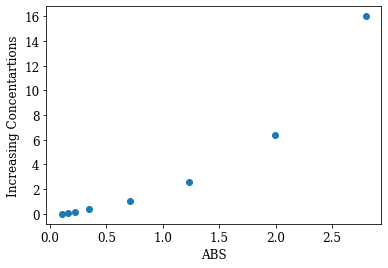

In [264]:
x=data['STD_2']
y=data['STD_CONC']
plt.scatter(x,y)
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Fit Several Curves

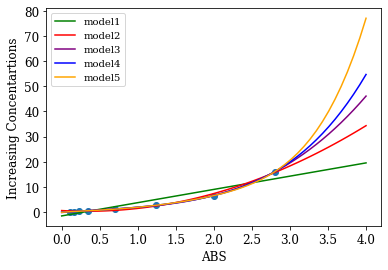

In [283]:
# convert data type to fit with poly1d
x = data['STD_2'].astype(str).astype(float)
y = data['STD_CONC'].astype(str).astype(float)

# fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(x,y,1))
model2 = np.poly1d(np.polyfit(x,y,2))
model3 = np.poly1d(np.polyfit(x,y,3))
model4 = np.poly1d(np.polyfit(x,y,4))
model5 = np.poly1d(np.polyfit(x,y,5))

#create scaterplot
polyline = np.linspace(0, 4, 50)
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(x,y)

#add fitted polynomial lines to scatterplot
plt.plot(polyline,model1(polyline),color='green',label="model1")
plt.plot(polyline, model2(polyline),color='red',label='model2')
plt.plot(polyline, model3(polyline),color='purple',label='model3')
plt.plot(polyline, model4(polyline),color='blue',label='model4')
plt.plot(polyline, model5(polyline),color='orange',label='model5')
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [284]:
# define function to calculate adjusted r-squared

def adjr(x,y, degree):
    results = {}
    coef = np.polyfit(x, y, degree)
    p = np.poly1d(coef)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y-ybar)**2)
    results['r_squared'] = 1 - (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

In [285]:
# calcuate the r-squared for each model
for i in range(1,6):
    print(adjr(x,y,i),"model",str(i))


{'r_squared': 0.8747125178548856} model 1
{'r_squared': 0.9917050001090824} model 2
{'r_squared': 0.9996991728734425} model 3
{'r_squared': 0.9999429473068482} model 4
{'r_squared': 0.9999634645604661} model 5


From the output,we can see that model5 achieved the highest adjusted r-squared with 0.9998.

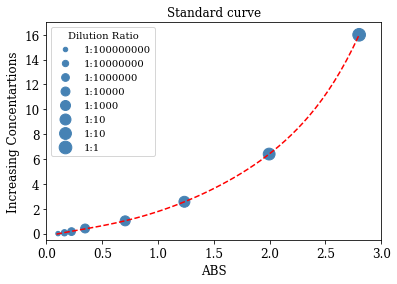

In [286]:
# visualize the final curve
model5 = np.poly1d(np.polyfit(x,y,5))

#define scatterplot
polyline = np.linspace(0.09,2.8,50)
points_size =[160,140,120,100,80,60,40,20]


sc = plt.scatter(x,y,s=points_size,color='steelblue')

# add fiffted plynomial curve to scatterplot
plt.ylim(-0.5,17)
plt.xlim(0,3)
#plt.legend(labels=['1','2'])
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.plot(polyline, model5(polyline), '--', color = 'red')
handles = sc.legend_elements(num=[0,1,2,3])[0]
L = plt.legend(*sc.legend_elements("sizes",color='steelblue'),title='Dilution Ratio')
L.get_texts()[0].set_text("1:100000000")
L.get_texts()[1].set_text("1:10000000")
L.get_texts()[2].set_text("1:1000000")
L.get_texts()[3].set_text("1:10000")
L.get_texts()[4].set_text("1:1000")
L.get_texts()[5].set_text("1:10")
L.get_texts()[6].set_text("1:10")
L.get_texts()[7].set_text("1:1")
plt.title("Standard curve")
plt.show()

### Serum from Infusion kits

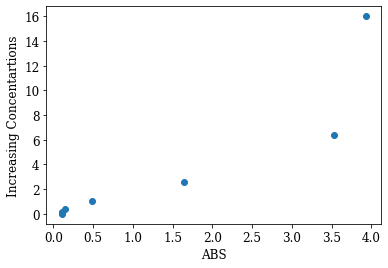

In [287]:
# convert data type to fit with poly1d
x = data['DUP_IN'].astype(str).astype(float)
y = data['STD_CONC'].astype(str).astype(float)
plt.scatter(x,y)
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Fit Several Curves

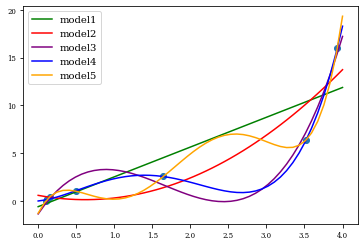

In [288]:
# fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(x,y,1))
model2 = np.poly1d(np.polyfit(x,y,2))
model3 = np.poly1d(np.polyfit(x,y,3))
model4 = np.poly1d(np.polyfit(x,y,4))
model5 = np.poly1d(np.polyfit(x,y,5))

#create scaterplot
polyline = np.linspace(0, 4, 50)
plt.scatter(x,y)

#add fitted polynomial lines to scatterplot
plt.plot(polyline,model1(polyline),color='green',label="model1")
plt.plot(polyline, model2(polyline),color='red',label='model2')
plt.plot(polyline, model3(polyline),color='purple',label='model3')
plt.plot(polyline, model4(polyline),color='blue',label='model4')
plt.plot(polyline, model5(polyline),color='orange',label='model5')
plt.legend()
plt.show()

In [289]:
# calcuate the r-squared for each model
for i in range(1,6):
    print(adjr(x,y,i),"model",str(i))

{'r_squared': 0.7882041380609458} model 1
{'r_squared': 0.8404098926517194} model 2
{'r_squared': 0.9659702398360485} model 3
{'r_squared': 0.9992950350815886} model 4
{'r_squared': 0.9998616928243106} model 5


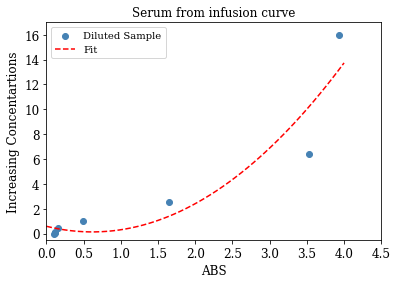

In [290]:
# visualize the final curve
model5 = np.poly1d(np.polyfit(x,y,2))

# #define scatterplot
# polyline = np.linspace(0.09,4.1,50)
# points_size =[160,140,120,100,80,60,40,20]


sc = plt.scatter(x,y,color='steelblue')

# add fiffted plynomial curve to scatterplot
plt.ylim(-0.5,17)
plt.xlim(0,4.5)
#plt.legend(labels=['1','2'])
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.plot(polyline, model5(polyline), '--', color = 'red')
# handles = sc.legend_elements(num=[0,1,2,3])[0]
# L = plt.legend(*sc.legend_elements("sizes",color='steelblue'),title='Dilution Ratio')
# L.get_texts()[0].set_text("1:100000000")
# L.get_texts()[1].set_text("1:10000000")
# L.get_texts()[2].set_text("1:1000000")
# L.get_texts()[3].set_text("1:10000")
# L.get_texts()[4].set_text("1:1000")
# L.get_texts()[5].set_text("1:10")
# L.get_texts()[6].set_text("1:10")
# L.get_texts()[7].set_text("1:1")
plt.title("Serum from infusion curve")
plt.legend(['Diluted Sample','Fit'])
plt.show()

### Serum for syringe

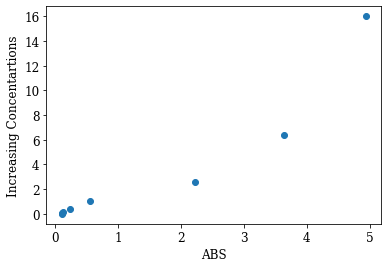

In [291]:
# convert data type to fit with poly1d
x = data['SYN'].astype(str).astype(float)
y = data['STD_CONC'].astype(str).astype(float)
plt.scatter(x,y)
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Fit Several Curves

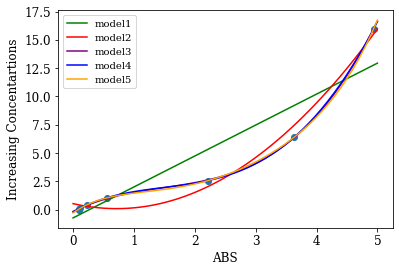

In [294]:
# fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(x,y,1))
model2 = np.poly1d(np.polyfit(x,y,2))
model3 = np.poly1d(np.polyfit(x,y,3))
model4 = np.poly1d(np.polyfit(x,y,4))
model5 = np.poly1d(np.polyfit(x,y,5))

#create scaterplot
polyline = np.linspace(0, 5, 50)
plt.scatter(x,y)

#add fitted polynomial lines to scatterplot
plt.plot(polyline,model1(polyline),color='green',label="model1")
plt.plot(polyline, model2(polyline),color='red',label='model2')
plt.plot(polyline, model3(polyline),color='purple',label='model3')
plt.plot(polyline, model4(polyline),color='blue',label='model4')
plt.plot(polyline, model5(polyline),color='orange',label='model5')
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

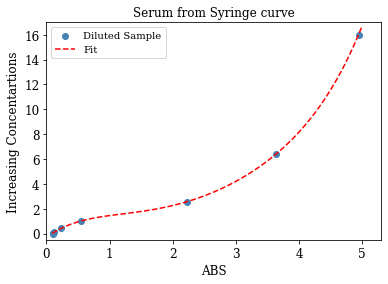

In [295]:
# visualize the final curve
model5 = np.poly1d(np.polyfit(x,y,5))

# #define scatterplot
polyline = np.linspace(0.09,5,50)
# points_size =[160,140,120,100,80,60,40,20]


sc = plt.scatter(x,y,color='steelblue')

# add fiffted plynomial curve to scatterplot
plt.ylim(-0.5,17)
plt.xlim(0,5.3)
#plt.legend(labels=['1','2'])
plt.xlabel('ABS',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Increasing Concentartions',fontsize=12)
plt.yticks(fontsize=12)
plt.plot(polyline, model5(polyline), '--', color = 'red')
# handles = sc.legend_elements(num=[0,1,2,3])[0]
# L = plt.legend(*sc.legend_elements("sizes",color='steelblue'),title='Dilution Ratio')
# L.get_texts()[0].set_text("1:100000000")
# L.get_texts()[1].set_text("1:10000000")
# L.get_texts()[2].set_text("1:1000000")
# L.get_texts()[3].set_text("1:10000")
# L.get_texts()[4].set_text("1:1000")
# L.get_texts()[5].set_text("1:10")
# L.get_texts()[6].set_text("1:10")
# L.get_texts()[7].set_text("1:1")
plt.title("Serum from Syringe curve")
plt.legend(['Diluted Sample','Fit'])
plt.show()

### Conclusion

From plots, we can say that BDNF levels are more linearized and achieved higher BDNF through syringe method.